IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

Kamouche Neïla et Ikhenoussene Yanis

Ce projet peut être fait (c'est même recommandé) en binôme. Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - mars 2022


<font size="+1" color="RED"><b>Date de rendu : vendredi 25 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur:
- les données Bases_IADS : cela correspond à un problème de classification binaire
- les données Bases_IADS_multiclasses : cela correspond à un problème de classification multiclasses

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivantes:

          -- ce_notebook.ipynb
          -- Bases_IADS/ 
              -- README.txt
              -- train.csv
              -- test.csv
              -- eval.csv
              -- names.csv
          -- Bases_IADS_multiclasses/
              -- README.txt
              -- train_multi.csv
              -- test_multi.csv
              -- eval_multi.csv
              -- names_multi.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.


Les fichiers de chaque répertoire correspondent à:
- fichier README.txt : donne des explications sur le contenu du répertoire
- fichier train*.csv : base d'apprentissage à utiliser pour construire le classfieur
- fichier test*.csv : base de test pour évaluer vous même le classifieur construit. Les exemples de ce fichier NE DOIVENT PAS être utilisés pour l'apprentissage du classifieur.
- fichier eval*.csv : fichier d'évaluation du classifieur (voir ci-dessous).

## Travail à faire

Pour chaque ensemble de données:
- les 2 algorithmes d'apprentissage knn et perceptron doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations pourront être : comparaison des taux de bonne classification apprentissage / test (avec validation croisée), visualisation, etc.
- de plus, un fichier `eval.csv` est fourni. Ce fichier contient des descriptions associées à un "faux" label. Dans votre compte-rendu, vous devez fournir un fichier CSV qui donne, pour chaque exemple du fichier `eval.csv`la classe trouvée par votre meilleur classifieur. Ainsi, le fichier CSV à rendre doit comporter 2 colonnes et autant de lignes que d'exemples (une ligne par exemple du fichier eval):<br>
            IDENTIFIANT;CLASSE_TROUVEE_POUR_CET_EXEMPLE
            ...
Le résultat de classification vous sera donné en retour (nous connaissons la vraie classe des exemples de ce fichier...).

Vos **expérimentations doivent être expliquées** (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.


Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.



## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement)
- ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !
- un fichier CSV dont le nom est de la forme: *projet-1-Nom1_Nom2.csv* (sur le modèle du nom du notebook) qui donne la classe de chaque exemple du fichier `eval.csv` trouvée par votre classifieur.


**Remarque**: en considérant que les algorithmes knn et perceptron ont été réalisés lors des séances de TME 1 à 6, le travail demandé pour ce projet correspond à, au plus, une séance complète de TME.

## Importation des librairies standards

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy
%matplotlib inline  
import sys
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Chargement des fichiers de données

In [2]:
#Chargement du noms des colonnes

#Bases_IADS
names_df = pd.read_csv("Bases_IADS/names.csv",sep=';')
names = np.array(names_df.columns)

#Bases_IADS_multiclasses
names_multi_df = pd.read_csv("Bases_IADS_multiclasses/names_multi.csv",sep=';')
names_multi = np.array(names_multi_df.columns)

In [3]:
#Bases_IADS
test_df = pd.read_csv("Bases_IADS/test.csv",names = names,sep=';')
train_df = pd.read_csv("Bases_IADS/train.csv",names = names,sep=';')
eval_df = pd.read_csv("Bases_IADS/eval.csv",names = names,sep=';')

In [4]:
#Bases_IADS_multiclasses
test_multi_df = pd.read_csv("Bases_IADS_multiclasses/test_multi.csv",names = names_multi,sep=';')
train_multi_df = pd.read_csv("Bases_IADS_multiclasses/train_multi.csv",names = names_multi,sep=';')
eval_multi_df = pd.read_csv("Bases_IADS_multiclasses/eval_multi.csv",names = names_multi,sep=';')

## Passage des dataframes à des arrays

In [5]:
#Bases_IADS

#Exemples et labels de test
test_desc = np.array(test_df[names])
test_eval = test_desc[:,0] # Permet d'avoir une liste des identifiants
test_desc = test_desc[:,1:-1] # Permet de retirer les identifiants et les labels
test_label = np.array(test_df['label'])

#Exemple et label de train
train_desc = np.array(train_df[names])
train_desc = train_desc[:,1:-1]
train_label = np.array(train_df['label'])

#Exemple et label de eval
eval_desc = np.array(eval_df[names])
eval_desc = eval_desc[:,1:-1]
eval_label = np.array(eval_df['label'])

In [6]:
#Bases_IADS_multiclasses

#Exemples et labels de test
test_multi_desc = np.array(test_multi_df[names_multi])
test_eval_multi = test_multi_desc[:,0]
test_multi_desc = test_multi_desc[:,1:-1]
test_multi_label = np.array(test_multi_df['label'])

#Exemple et label de train
train_multi_desc = np.array(train_multi_df[names_multi])
train_multi_desc = train_multi_desc[:,1:-1]
train_multi_label = np.array(train_multi_df['label'])

#Exemple et label de eval
eval_multi_desc = np.array(eval_multi_df[names_multi])
eval_multi_desc = eval_multi_desc[:,1:-1]
eval_multi_label = np.array(eval_multi_df['label'])

## Importation des classes

### Classifier

In [7]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """

    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        raise NotImplementedError("Please Implement this method")

    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        accurate = 0
        for i in range(0,len(desc_set)) :
            if self.predict(desc_set[i]) == label_set[i] :
                accurate += 1

        return accurate/len(desc_set)

### ClassifierKNN

In [8]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """


    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.dataDim = input_dimension
        self.nbVoisins = k


    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        dist = len(self.reference)*[0]
        # calcul du tableau des distances
        for i in range(len(self.reference)) :
            dist[i] = np.linalg.norm(x-self.reference[i])

        # tri du tableau
        tri = np.argsort(dist)
        total = 0
        for i in range(0,self.nbVoisins) :
            if self.label[tri[i]] == +1 :
                total += 1
        p = total / self.nbVoisins
        return 2*(p-0.5)


    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        if self.score(x) <0:
            return -1
        else:
            return +1

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        self.reference = desc_set
        self.label = label_set

### ClassifierPerceptron

In [9]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate, init=0):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - init est le mode d'initialisation de w:
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """

        self.learning_rate = learning_rate
        self.init = init


        if self.init == 0 :
            self.w = np.zeros(input_dimension)
        else :
            self.w = np.random.uniform(0,1,input_dimension)
            self.w = 2*self.w-1
            self.w = 0.001*self.w


    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """


        #recuperation d'une valeur de l'array aleatoire
        index = [i for i in range(0,len(desc_set))]
        np.random.shuffle(index)
        for i in index :
            x = desc_set[i]
            x_label = label_set[i]
            #verification de la prediction
            if self.predict(x) != x_label:
                self.w = self.w + self.learning_rate*x_label*x



    def train(self, desc_set, label_set, niter_max=100, seuil=0.01):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """
        liste = []
        n = 0

        for i in range(niter_max):
            loc = self.w.copy()
            self.train_step(desc_set, label_set)

            #calcul de convergence
            tmp = loc - self.w
            val_tmp = np.linalg.norm(np.absolute(tmp))
            liste.append(val_tmp)

            #si ils sont pareils, n augmente
            if val_tmp<=seuil:
                return liste

        return liste

    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(x,self.w)

    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        if self.score(x) <0:
            return -1
        else:
            return +1

### ClassifierPerceptron_MC

In [10]:
class ClassifierPerceptron_MC(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate,nb_class, init=0):
        """ Constructeur de Classifier
            Argument:
                - nb_class : nombre de classe 
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate : epsilon
                - init est le mode d'initialisation de w:
                    - si 0 (par défaut): initialisation à 0 de w,
                    - si 1 : initialisation par tirage aléatoire de valeurs petites
        """
        self.classifiers = []
        self.nb_class = nb_class
        for i in range(nb_class):
            self.classifiers.append(ClassifierPerceptron(input_dimension, learning_rate, init))
        

    def train(self, desc_set, label_set):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """
        for i in range(self.nb_class):
            label = label_set.copy()
            label[label != i] = -1
            label[label == i] = +1
            self.classifiers[i].train(desc_set, label)
    

    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.array([cl.score(x) for cl in self.classifiers])

    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        return np.argmax(self.score(x))

### ClassifierMultiOAA

In [11]:
class ClassifierMultiOAA(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, cl):
        """ Constructeur de Classifier
            Argument:
                cl : classifieur binaire
        """
        
        self.cl = cl
        self.classifieurs = []

    def train(self, desc_set, label_set):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - niter_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.01) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
        """
        nCl = len(np.unique(label_set))
        for i in range(nCl) :
            self.classifieurs.append(copy.deepcopy(self.cl))
        
        for i in range(nCl) :
            liste_desc = []
            liste_label = []
            for j in range(len(label_set)) :
                liste_desc.append(desc_set[j])
                if label_set[j] == i :
                    liste_label.append(1)
                else :
                    liste_label.append(-1)
            self.classifieurs[i].train(liste_desc, liste_label)
    

    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        liste = []
        for perc in self.classifieurs :
            liste.append(perc.score(x))
        
        return liste

    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        
        liste = self.score(x)
        maxi = -1
        index = 0
        for i in range(len(liste)) :
            if liste[i] > maxi :
                index = i
                maxi = liste[i]
        return index
    
    def accuracy(self, desc_set, label_set):
        """rend la precision de la classification du classifieur
        """
        yhat = np.array([self.predict(x) for x in desc_set])
        
        return np.where(label_set == yhat, 1., 0.).mean()


### Quelques fonctions utiles

In [12]:
def crossval(X, Y, n, i):
    start, end = i*int(len(Y)/n), (i+1)*int(len(Y)/n)
    Xtrain = np.delete(X, np.s_[start:end], axis=0)
    Ytrain = np.delete(Y, np.s_[start:end], axis=0)
    Xtest = X[start:end]
    Ytest = Y[start:end]
    return Xtrain, Ytrain, Xtest, Ytest

# Experimentation des algorithmes d'apprendrentissage
## Base_IADS

On commence par expérimenter la base_IADS fournit.
On commence donc avec le ClassifierPerceptron. 
Ensuite nous testerons sur plusieurs valeurs de k pour le ClassifierKNN que l'on fera varier de 1 à 10 pour savoir quelle valeur de k est la meilleure.
Une fois trouvé, on comparera les résultats entre les 2 algorithmes de d'apprentissage.

### Visualisation des données d'entraînement avec classes binaires

/opt/homebrew/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


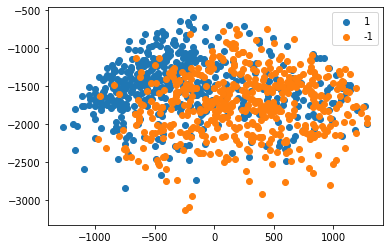

In [13]:
u,v = np.linalg.eig(train_desc.T @ train_desc) # Nous permet de calculer le vecteur propre
a,b = np.argsort(u)[-2:] # Permet de trier et de selectionner les 2 vecteurs associes aux 2 plus grandes valeurs propres

# Affichage des valeurs
vals_a = np.dot(train_desc, v.T[a])
vals_b = np.dot(train_desc, v.T[b])
plt.scatter(vals_a[train_label == 1], vals_b[train_label == 1])
plt.scatter(vals_a[train_label == -1], vals_b[train_label == -1])
plt.legend(['1','-1'])

### Visualisation des données de test avec classes binaires

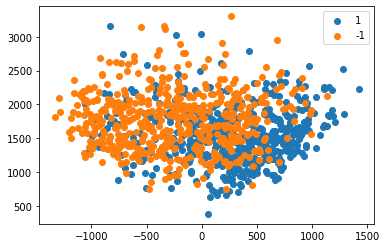

In [14]:
u,v = np.linalg.eig(test_desc.T @ test_desc) # Nous permet de calculer le vecteur propre
a,b = np.argsort(u)[-2:] # Permet de trier et de selectionner les 2 vecteurs associes aux 2 plus grandes valeurs propres

# Affichage des valeurs
vals_a = np.dot(test_desc, v.T[a])
vals_b = np.dot(test_desc, v.T[b])
plt.scatter(vals_a[test_label == 1], vals_b[test_label == 1])
plt.scatter(vals_a[test_label == -1], vals_b[test_label == -1])
plt.legend(['1','-1'])

### ClassifierPerceptron

Le perceptron 0 a pour meilleur learning rate  0.30000000000000004  avec une accuracy de :  0.871
Le perceptron 1 a pour meilleur learning rate  0.1  avec une accuracy de :  0.876


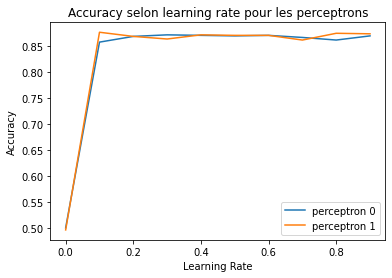

In [15]:
np.random.seed(42)

accuracies_perc = [] # liste qui stock les accuracies avec un perceptron (0 ou 1) que l'on utilisera dans une comparaison a la conclusion

long,input_dim = np.shape(train_desc) # Recuperation des dimensions de notre base d'apprentissage
vals = np.arange(0,1,0.1) # Tableau contenant des valeurs permettant de faire varier le learning_rate
best_lr_0 = 0 # Contient le meilleur learning rate pour le perceptron 0
best_lr_1 = 0 # Contient le meilleur learning rate pour le perceptron 1
best_accu_0 = 0 # Contient la meilleure accuracy pour le perceptron 0
best_accu_1 = 0 # Contient la meilleure accuracy pour le perceptron 1
best_perceptron_0 = None # Contient le perceptron 0 qui donne les meilleurs resultats
best_perceptron_1 = None # Contient le perceptron 0 qui donne les meilleurs resultats
acc_tab_0 = [] # Tableau contenant les accuracy du perceptron 0
acc_tab_1 = [] # Tableau contenant les accuracy du perceptron 1

# On fait varier la valeur du learning_rate afin de tester différents cas
for learning_rate in vals :
    
    #print("Pour un learning rate de ",learning_rate)
    # Creation des perceptrons
    un_perceptron_0 = ClassifierPerceptron(input_dim,learning_rate) # Perceptron avec init à 0
    un_perceptron_1 = ClassifierPerceptron(input_dim,learning_rate, 1) # Perceptron avec init à 1
    
    # Apprentissage des perceptrons avec la base train
    un_perceptron_0.train(train_desc, train_label)
    un_perceptron_1.train(train_desc, train_label)
    
    # Test de nos perceptrons avec la base test
    accu_0 = un_perceptron_0.accuracy(test_desc, test_label)
    accu_1 = un_perceptron_1.accuracy(test_desc, test_label)
    acc_tab_0.append(accu_0)
    acc_tab_1.append(accu_1)
    accuracies_perc.append(accu_0)
    #print("Le perceptron 0 a une precision de ", accu_0)
    #print("Le perceptron 1 a une precision de ", accu_1)
    
    # Determination du meilleur learning rate (plus grande accuracy)
    if accu_0 > best_accu_0 :
        best_accu_0 = accu_0
        best_lr_0 = learning_rate
        best_perceptron_0 = un_perceptron_0
    if accu_1 > best_accu_1 :
        best_accu_1 = accu_1
        best_lr_1 = learning_rate
        best_perceptron_1 = un_perceptron_1


# Affichage des graphiques de l'evolution de l'accuracy en fonction du learning rate
plt.title("Accuracy selon learning rate pour les perceptrons")
plt.plot(vals,acc_tab_0,label='perceptron 0')
plt.plot(vals,acc_tab_1, label='perceptron 1')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend(loc='lower right')

# Affichage des meilleurs learning rates
print("Le perceptron 0 a pour meilleur learning rate ",best_lr_0," avec une accuracy de : ",best_accu_0)
print("Le perceptron 1 a pour meilleur learning rate ",best_lr_1," avec une accuracy de : ",best_accu_1)

#### Validation croisée pour le ClassifierPerceptron dans un contexte de classes binaires

In [16]:
larg, input_dim = np.shape(train_desc) # Recuperation de la dimension
index = np.random.permutation(input_dim) # Nous melangeons ici les indices
Xb = train_desc[index]
Yb = train_label[index]
perf_perceptron = [] # Tableau qui nous permettra d'effectuer la validation croisee
niter_max = 100 # Nombre d'iterations

# Validation croisee 
for i in range(niter_max) :
    Xapp, Yapp, Xtest, Ytest = crossval(Xb,Yb,niter_max,i)
    un_perceptron = ClassifierPerceptron(input_dim, 0.1, 1) # Nous gardons ici le perceptron 1 qui nous a donner la meilleure accuracy et le learning rate associe a cette derniere
    un_perceptron.train(Xapp,Yapp)
    perf_perceptron.append(un_perceptron.accuracy(Xtest,Ytest))
    
# Affichage de la liste
print(perf_perceptron)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 0.7142857142857143, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 0.7142857142857143, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 0.7142857142857143, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 1.0, 0.7142857142857143, 1.0, 0.7142857142857143, 1.0, 0.8571428571428571, 0.7142857142857143, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0,

In [17]:
print("La moyenne des performances du perceptron est de : ", np.mean(np.mean(perf_perceptron)))
print("La variance des performances du perceptron est de : ", np.var(perf_perceptron))

La moyenne des performances du perceptron est de :  0.937142857142857
La variance des performances du perceptron est de :  0.007885714285714288


### ClassifierKNN

Le meilleur k est  5  avec une accuracy de  0.946


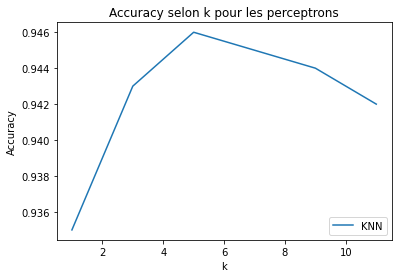

In [19]:
# Definition des valeurs necessaires
_,input_dim = np.shape(train_desc)
best_k = 0
best_accu = 0
vals = np.arange(1,12,2)
acc_tab = [] # Tableau que l'on reutilisera a la conclusion

# Variation du k de 1 à 11
for k in vals :
    
    # Apprentissage du classifier
    un_KNN = ClassifierKNN(input_dim,k)
    un_KNN.train(train_desc,train_label)
    accu = un_KNN.accuracy(test_desc,test_label)
    
    # Calcul du meilleur accuracy
    if best_accu < accu :
        best_k = k
        best_accu = accu
    acc_tab.append(accu)

# Affichage des graphiques de l'evolution de l'accuracy en fonction de k
plt.title("Accuracy selon k pour les perceptrons")
plt.plot(vals,acc_tab,label='KNN')
plt.ylabel('Accuracy')
plt.xlabel('k')
plt.legend(loc='lower right')

# Affichage du meilleur accuracy
print("Le meilleur k est ", best_k, " avec une accuracy de ",best_accu)

#### Validation croisée avec un classifier KNN dans un contexte de classes binaires

In [20]:
_, input_dim = np.shape(train_desc) # Recuperation de la dimension
index = np.random.permutation(input_dim) # Nous melangeons ici les index
Xb = train_desc[index]
Yb = train_label[index]
perf_knn = [] # Tableau contenant les accuracies pour chaque iteration
niter = 100

for i in range(niter) :
    Xapp,Yapp,Xtest,Ytest = crossval(Xb, Yb, niter, i)
    un_KNN = ClassifierKNN(input_dim, 5) # Nous gardons ici le k qui nous a donner les meilleurs resultats
    un_KNN.train(Xapp, Yapp)
    perf_knn.append(un_KNN.accuracy(Xtest, Ytest))
print(perf_knn)

[0.7142857142857143, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7142857142857143, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 0.7142857142857143, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 1.0, 0.7142857142857143, 1.0, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.7142857142857143, 0.8571428571428571, 1.0, 1.0]


In [21]:
print("La moyenne des performances du perceptron est de : ", np.mean(np.mean(perf_knn)))
print("La variance des performances du perceptron est de : ", np.var(perf_knn))

La moyenne des performances du perceptron est de :  0.9514285714285715
La variance des performances du perceptron est de :  0.006620408163265309


## Conclusion
On en conclut donc que le ClassifierKNN est plus efficace sur des exemples à 2 classes qu'un ClassifierPerceptron. Il a une moyenne d'accuracies plus élevée mais une variance plus faible il est donc moins robuste que le perceptron.

[0.935, 0.943, 0.946, 0.945, 0.944, 0.942]
[0.5, 0.857, 0.868, 0.871, 0.87, 0.869, 0.87, 0.866, 0.861, 0.869]


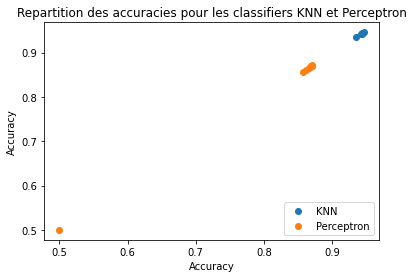

In [22]:
print(acc_tab)
print(accuracies_perc)

# Affichage des deux tableaux sur un graphe afin de confirmer notre conclusion
plt.scatter(acc_tab,acc_tab, label='KNN')
plt.scatter(accuracies_perc,accuracies_perc, label="Perceptron")
plt.title("Repartition des accuracies pour les classifiers KNN et Perceptron")
plt.ylabel('Accuracy')
plt.xlabel('Accuracy')
plt.legend(loc="lower right")
plt.show()

Nous remarquons que notre conclusion est bien validée ici, le KNN donne de meilleures accuracies que le Perceptron

### Fichier Eval
Nous allons donc utiliser le ClassifierKNN avec un k ayant pour valeur 5 (celui qui nous donne l'accuracy maximale) pour trouver les classes du fichier eval.csv. Pour se faire, après avoir fait l'apprentissage du data_set, nous allons utiliser la fonction de prédiction dont les résultats seront stockés dans une array. Nous afficherons ensuite cette dernière dans un fichier csv. 

In [46]:
np.random.seed(42)

long,input_dim = np.shape(train_desc)
un_KNN = ClassifierKNN(input_dim,5) # 5 correspond au meilleur k trouve avec la base d'apprentissage train_desc
un_KNN.train(train_desc, train_label)
identifiants = test_eval # Tableau contenant les identifiants des exemples d'eval
predictions = [] # Tableau contenant les predictions faites par notre classifier sur chaque exemple du data set

# On predit pour chaque exemple du data set et on ajoute à la liste des predictions
for exemple in eval_desc :
    predictions.append(un_KNN.predict(exemple))

# Creation d'un dataframe afin de le convertir en fichier csv
array_predictions = np.array(predictions) # Conversion du tableau en array numpy
data = np.column_stack((identifiants,array_predictions)) # On fusionne les arrays des identifiants et des predictions en une seule de sorte a former deux colonnes
df_eval = pd.DataFrame(data = data, columns=['IDENTIFIANT','CLASSE_TROUVEE_POUR_CET_EXEMPLE']) # On cree le data frame
df_eval.to_csv("Bases_IADS/eval_binaire_KNN.csv",sep=";",index=False,header=False) # On importe le dataframe dans un fichier csv en ayant pris soin de retirer les index et les colonnes et en ayant comme separateur ; comme demande
df_eval

,IDENTIFIANT,CLASSE_TROUVEE_POUR_CET_EXEMPLE
0,20001,-1
1,20002,-1
2,20003,1
3,20004,1
4,20005,1
...,...,...
995,20996,1
996,20997,1
997,20998,-1
998,20999,1


#### Visualisation des données d'eval avant le tri du classifier

/opt/homebrew/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'Visualisation des données contenues dans eval.csv')

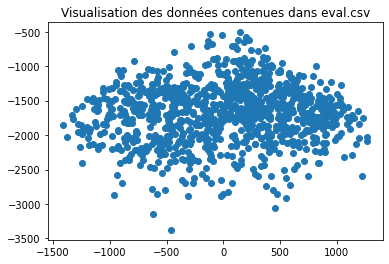

In [47]:
u,v = np.linalg.eig(eval_desc.T @ eval_desc)

a,b = np.argsort(u)[-2:]

# 3) affichage (plot) avec un code couleur pour les classes
eval_a = np.dot(eval_desc, v.T[a])
eval_b = np.dot(eval_desc, v.T[b])
plt.scatter(eval_a, eval_b)
plt.title("Visualisation des données contenues dans eval.csv")

#### Visualisation des donnéees d'eval après le tri du classifier

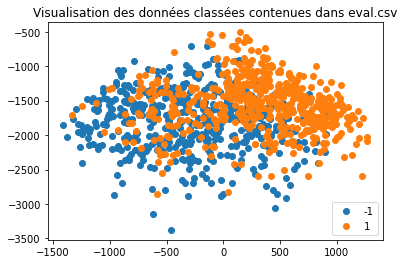

In [49]:

u,v = np.linalg.eig(eval_desc.T @ eval_desc)
a,b = np.argsort(u)[-2:]

classes = np.unique(predictions)
eval_a_pred = np.dot(eval_desc, v.T[a])
eval_b_pred = np.dot(eval_desc, v.T[b])

for i in classes :
    plt.scatter(eval_a_pred[predictions==i], eval_b_pred[predictions==i])

plt.legend(classes,loc='lower right')
plt.title("Visualisation des données classées contenues dans eval.csv")
plt.show()

## Base_IADS_multi

On fait les mêmes étapes que pour la base_iads.



### Visualisation des données d'entraînement multiclasses

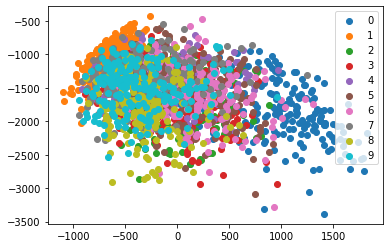

In [28]:
u,v = np.linalg.eig(train_multi_desc.T @ train_multi_desc) # Nous permet de calculer le vecteur propre
a,b = np.argsort(u)[-2:] # Permet de trier et de selectionner les 2 vecteurs associes aux 2 plus grandes valeurs propres

# Affichage des valeurs
vals_a = np.dot(train_multi_desc, v.T[a])
vals_b = np.dot(train_multi_desc, v.T[b])
nb_class = len(np.unique(train_multi_label)) # Recuperation du nombre de classes

for i in range(nb_class) :
    plt.scatter(vals_a[train_multi_label == i], vals_b[train_multi_label == i]) # Pour chaque classe, on affiche avec une couleur differente
plt.legend(np.unique(train_multi_label))

### Visualisation des données de tests multiclasses

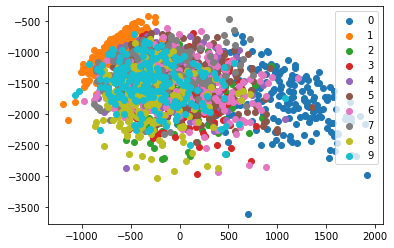

In [29]:
u,v = np.linalg.eig(test_multi_desc.T @ test_multi_desc) # Nous permet de calculer le vecteur propre
a,b = np.argsort(u)[-2:] # Permet de trier et de selectionner les 2 vecteurs associes aux 2 plus grandes valeurs propres

# Affichage des valeurs
vals_a = np.dot(test_multi_desc, v.T[a])
vals_b = np.dot(test_multi_desc, v.T[b])
nb_class = len(np.unique(test_multi_label)) # Recuperation du nombre de classes

for i in range(nb_class) :
    plt.scatter(vals_a[test_multi_label == i], vals_b[test_multi_label == i]) # Pour chaque classe, on affiche avec une couleur differente
plt.legend(np.unique(test_multi_label))

#### ClassifierPerceptron_MC

Le perceptron 0 a pour meilleur learning rate  0.9  avec une accuracy de :  0.836
Le perceptron 1 a pour meilleur learning rate  0.8  avec une accuracy de :  0.83


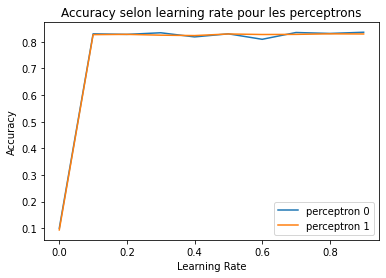

In [37]:
np.random.seed(42)

accuracies_perc_multi = [] # Tableau que l'on utilisera pour la conclusion 

long,input_dim = np.shape(train_multi_desc)
vals = np.arange(0,1,0.1)
nb_class = len(np.unique(train_multi_label))
best_lr_0 = 0
best_lr_1 = 0
best_accu_0 = 0
best_accu_1 = 0
best_perceptron_0_MC = None
best_perceptron_1_MC = None
acc_tab_0 = [] # Tableau contenant les accuracy du perceptron 0
acc_tab_1 = [] # Tableau contenant les accuracy du perceptron 1
predictions_0 = [] # Tableau contenant les predictions de notre meilleur perceptron 0 afin de visualiser les donnees selon ses predictions
predictions_1 = [] # Tableau contenant les predictions de notre meilleur perceptron 1 afin de visualiser les donnees selon ses predictions

# On fait varier la valeur du learning_rate afin de tester différents cas
for learning_rate in vals :
    
    #print("Pour un learning rate de ",learning_rate)
    # Creation des perceptrons
    un_perceptron_0 = ClassifierPerceptron_MC(input_dim,learning_rate,nb_class) # Perceptron avec init à 0
    un_perceptron_1 = ClassifierPerceptron_MC(input_dim,learning_rate,nb_class, 1) # Perceptron avec init à 1
    
    # Apprentissage des perceptrons avec la base train
    un_perceptron_0.train(train_multi_desc, train_multi_label)
    un_perceptron_1.train(train_multi_desc, train_multi_label)
    
    # Test de nos perceptrons avec la base test
    accu_0 = un_perceptron_0.accuracy(test_multi_desc, test_multi_label)
    accu_1 = un_perceptron_1.accuracy(test_multi_desc, test_multi_label)
    acc_tab_0.append(accu_0)
    acc_tab_1.append(accu_1)
    accuracies_perc_multi.append(accu_0)
    #print("Le perceptron 0 a une precision de ", accu_0)
    #print("Le perceptron 1 a une precision de ", accu_1)
    
    # Determination du meilleur learning rate (plus grande accuracy)
    if accu_0 > best_accu_0 :
        best_accu_0 = accu_0
        best_lr_0 = learning_rate
        best_perceptron_0_MC = un_perceptron_0
    if accu_1 > best_accu_1 :
        best_accu_1 = accu_1
        best_lr_1 = learning_rate
        best_perceptron_1_MC = un_perceptron_1

# Affichage des meilleurs learning rates
print("Le perceptron 0 a pour meilleur learning rate ",best_lr_0," avec une accuracy de : ",best_accu_0)
print("Le perceptron 1 a pour meilleur learning rate ",best_lr_1," avec une accuracy de : ",best_accu_1)

# Affichage des graphiques de l'evolution de l'accuracy en fonction du learning rate
plt.title("Accuracy selon learning rate pour les perceptrons")
plt.plot(vals,acc_tab_0,label='perceptron 0')
plt.plot(vals,acc_tab_1, label='perceptron 1')
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.legend(loc='lower right')

#### Validation croisée pour le ClassifierPerceptron_MC dans un contexte de classes multiples

In [74]:
_,input_dim = np.shape(train_multi_desc)
nb_class = len(np.unique(train_multi_label))
index = np.random.permutation(input_dim) # Nous melangeons ici les indices
Xb = train_multi_desc[index]
Yb = train_multi_label[index]
perf_perceptron_MC = []
niter = 50

for i in range(niter) :
    Xapp,Yapp,Xtest,Ytest = crossval(Xb, Yb, niter, i)
    un_perceptron_MC = ClassifierPerceptron_MC(input_dim, 0.01,nb_class ) # Nous gardons le perceptron qui nous a donner les meilleurs resultats avec le learning rate associe
    un_perceptron_MC.train(Xapp, Yapp)
    perf_perceptron_MC.append(un_perceptron_MC.accuracy(Xtest, Ytest))
print(perf_perceptron_MC)

[0.9333333333333333, 1.0, 0.9333333333333333, 1.0, 1.0, 1.0, 0.9333333333333333, 0.8666666666666667, 0.8666666666666667, 0.9333333333333333, 1.0, 1.0, 1.0, 0.8666666666666667, 0.8, 1.0, 1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9333333333333333, 0.8, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0, 0.8666666666666667, 0.8, 1.0, 0.9333333333333333, 0.9333333333333333, 0.8, 0.8666666666666667, 1.0, 0.9333333333333333, 1.0, 0.9333333333333333]


In [75]:
print("La moyenne des performances du perceptron est de : ", np.mean(np.mean(perf_perceptron_MC)))
print("La variance des performances du perceptron est de : ", np.var(perf_perceptron_MC))

La moyenne des performances du perceptron est de :  0.9426666666666667
La variance des performances du perceptron est de :  0.004268444444444443


#### ClassifierOAA (KNN multiclasse)
Le classifier KNN étant un classifier binaire, nous utiliserons le classifier OAA qui permet, à partir d'un classifier binaire, l'apprentissage de bases multiclasses. Le classifier OAA va utiliser KNN et va, pour chaque classe, rendre le tout binaire en prenant la classe a etudier et l'opposer à toutes les autres classes. (Installez vous confortablement, l'execution prend du temps !)

Le meilleur k est  5  avec une accuracy de  0.9025


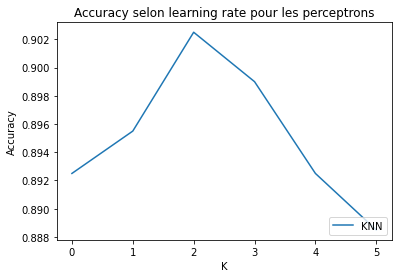

In [22]:
np.random.seed(42)

_,input_dim = np.shape(train_multi_desc)
best_k = 0
best_accu = 0
acc_tab_multi = [] # Tableau que l'on reutilisera lors de la conclusion

# variation du k de 1 à 12
for k in range(1,12,2) :
    un_KNN = ClassifierKNN(input_dim,k)
    un_OAA = ClassifierMultiOAA(un_KNN)
    un_OAA.train(train_multi_desc,train_multi_label)
    accu = un_OAA.accuracy(test_multi_desc,test_multi_label)
    if best_accu < accu :
        best_k = k
        best_accu = accu
    acc_tab_multi.append(accu)
    # Affichage du taux de bonne classification    
    #print("Taux de bonne classification sur le dataset: ", accu)
    
print("Le meilleur k est ", best_k, " avec une accuracy de ",best_accu)

# Affichage des graphiques de l'evolution de l'accuracy en fonction du learning rate
plt.title("Accuracy selon learning rate pour les perceptrons")
plt.plot(acc_tab_multi,label='KNN')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.legend(loc='lower right')

#### Validation des données croisées pour le classifier KNN dans un contexte de classes multiples

In [77]:
_, input_dim = np.shape(train_multi_desc)
index = np.random.permutation(input_dim) # Nous melangeons ici les index
Xb = train_multi_desc[index]
Yb = train_multi_label[index]
perf_knn_MC = []
niter = 100

for i in range(niter) :
    Xapp,Yapp,Xtest,Ytest = crossval(Xb, Yb, niter, i)
    un_KNN = ClassifierKNN(input_dim,5)
    un_OAA = ClassifierMultiOAA(un_KNN)
    un_OAA.train(Xapp, Yapp)
    perf_knn_MC.append(un_OAA.accuracy(Xtest, Ytest))
print(perf_knn_MC)

[1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 0.7142857142857143, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 0.7142857142857143, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7142857142857143, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 0.7142857142857143, 0.8571428571428571, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0]


In [78]:
print("La moyenne des performances du perceptron est de : ", np.mean(np.mean(perf_knn_MC)))
print("La variance des performances du perceptron est de : ", np.var(perf_knn_MC))

La moyenne des performances du perceptron est de :  0.96
La variance des performances du perceptron est de :  0.005746938775510208


#### Conclusion
Une fois de plus, le KNN reste plus efficace que le perceptron quand il s'agit du multiclasse malgré le fait que KNN soit à la base fait pour les bases d'apprentissage binaires et ait été converti à l'aide du classifier OAA. La variance plus élevée du perceptron OAA nous indique néanmoins que ce dernier est plus coûteux en terme de ressources et de temps mais est plus robuste.

[0.8925, 0.8955, 0.9025, 0.899, 0.8925, 0.8885]
[0.1, 0.83, 0.828, 0.834, 0.8185, 0.83, 0.8095, 0.835, 0.8315, 0.836]


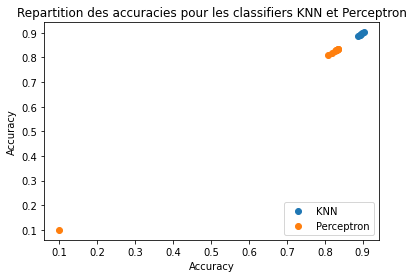

In [21]:
print(acc_tab_multi)
print(accuracies_perc_multi)

# Affichage des deux tableaux sur un graphe afin de confirmer notre conclusion
plt.scatter(acc_tab_multi,acc_tab_multi, label='KNN')
plt.scatter(accuracies_perc_multi,accuracies_perc_multi, label="Perceptron")
plt.title("Repartition des accuracies pour les classifiers KNN et Perceptron")
plt.ylabel('Accuracy')
plt.xlabel('Accuracy')
plt.legend(loc="lower right")
plt.show()

Une fois de plus, notre conclusion est confirmée par le graphique.

### Fichier Eval
On choisit ici aussi le classifier qui nous donne l'accuracy la plus élevée donc le ClassifierOAA avec 5 comme valeur pour k. Nous ferons les mêmes étapes que précédemment la seule différence étant le classifier utilisé.

In [30]:
np.random.seed(42)

long,input_dim = np.shape(train_desc)
un_KNN = ClassifierKNN(input_dim,5) # 5 correspond au meilleur k trouve avec la base d'apprentissage train_desc
un_OAA = ClassifierMultiOAA(un_KNN)
un_OAA.train(train_multi_desc, train_multi_label)
identifiants = test_eval_multi # Tableau contenant les identifiants des exemples
predictions_multi = [] # Tableau contenant les predictions faites par notre classifier sur chaque exemple du data set

# On predit pour chaque exemple du data set et on ajoute à la liste des predictions
for i in range(len(identifiants)) :
    predictions_multi.append(un_OAA.predict(test_multi_desc[i]))

# Creation d'un dataframe afin de le convertir en fichier csv
array_predictions = np.array(predictions_multi) # Conversion du tableau en array numpy
data = np.column_stack((identifiants,array_predictions)) # On fusionne les arrays des identifiants et des predictions en une seule de sorte a former deux colonnes
df_eval = pd.DataFrame(data = data, columns=['Identifiant','Prediction']) # On cree le data frame
df_eval.to_csv("Bases_IADS_multiclasses/eval_multi_OAA.csv",sep=";",index=False,header=False) # On importe le dataframe dans un fichier csv en ayant pris soin de retirer les index et les colonnes et en ayant comme separateur ; comme demande
df_eval

,Identifiant,Prediction
0,20001,0
1,20002,0
2,20003,0
3,20004,0
4,20005,0
...,...,...
1995,21996,9
1996,21997,9
1997,21998,9
1998,21999,9


#### Visualisation des données d'eval avant les prédictions du classifier

/opt/homebrew/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'Visualisation des données contenues dans eval.csv')

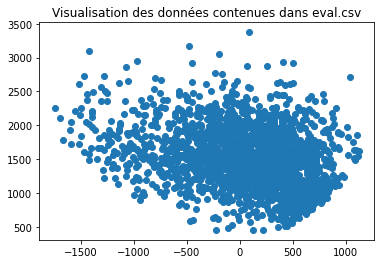

In [31]:
u,v = np.linalg.eig(eval_multi_desc.T @ eval_multi_desc)

a,b = np.argsort(u)[-2:]

# 3) affichage (plot) avec un code couleur pour les classes
eval_a = np.dot(eval_multi_desc, v.T[a])
eval_b = np.dot(eval_multi_desc, v.T[b])
plt.scatter(eval_a, eval_b)
plt.title("Visualisation des données contenues dans eval.csv")

#### Visualisation des données d'eval après les prédictions du classifier

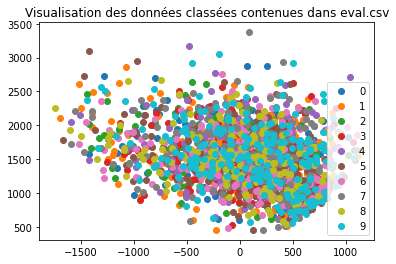

In [33]:
u,v = np.linalg.eig(eval_multi_desc.T @ eval_multi_desc)
a,b = np.argsort(u)[-2:]

classes = np.unique(predictions_multi)
eval_a_pred = np.dot(eval_multi_desc, v.T[a])
eval_b_pred = np.dot(eval_multi_desc, v.T[b])

for i in classes :
    plt.scatter(eval_a_pred[predictions_multi==i], eval_b_pred[predictions_multi==i])

plt.legend(classes,loc='lower right')
plt.title("Visualisation des données classées contenues dans eval.csv")
plt.show()